# import neccesary packages

In [1]:
import pickle
from statistics import mean
import matplotlib.pyplot as plt
import os

In [2]:
file_names = ['result_POP.pickle','result_MPC.pickle','result_LCE.pickle','result_LCD.pickle']

In [3]:
os.getcwd()

'/Users/sijiazhang/jupyter_notebook/socialccnsim'

# 😯 Load variables

In [8]:
if not os.path.exists('result'):
    os.mkdir('result')
os.chdir('result/')
if not os.path.exists('cache_size'):
    os.mkdir('cache_size')
os.chdir('cache_size')
result = {}
for file_name in file_names:
    f = open(file_name, 'rb')
    result[file_name] = pickle.load(f)
    f.close()
os.chdir('..')
os.chdir('..')

# Let's see the result of 

In [5]:
result

{'result_POP.pickle': {5: [762, 748, 778, 1020, 1039, 960, 843, 769, 638, 836],
  10: [940, 979, 992, 1205, 1268, 1242, 1257, 1264, 1264, 1255],
  15: [1064, 1148, 1181, 1315, 1329, 1361, 1403, 1362, 1380, 1409],
  20: [1184, 1255, 1246, 1407, 1419, 1454, 1424, 1430, 1491, 1466],
  25: [1294, 1366, 1350, 1478, 1508, 1495, 1527, 1516, 1500, 1503],
  30: [1312, 1423, 1411, 1485, 1531, 1560, 1571, 1583, 1571, 1554],
  35: [1362, 1471, 1507, 1584, 1583, 1615, 1615, 1584, 1595, 1601]},
 'result_MPC.pickle': {5: [117, 134, 199, 278, 355, 354, 343, 323, 349, 346],
  10: [238, 364, 474, 495, 478, 500, 493, 492, 514, 493],
  15: [314, 509, 559, 657, 613, 650, 623, 628, 598, 607],
  20: [466, 619, 677, 759, 759, 802, 791, 752, 741, 724],
  25: [431, 522, 631, 662, 723, 780, 772, 784, 708, 759],
  35: [531, 647, 678, 746, 827, 820, 817, 827, 845, 863]},
 'result_LCE.pickle': {5: [195, 231, 222, 192, 192, 218, 200, 198, 204, 177],
  10: [274, 275, 326, 268, 282, 293, 296, 310, 319, 297],
  20: [49

#  😯 Save variables

In [6]:
if not os.path.exists('result'):
    os.mkdir('result')
os.chdir('result/')
if not os.path.exists('cache_size'):
    os.mkdir('cache_size')
os.chdir('cache_size')
for filename in file_names:
    f = open(filename, 'wb')
    pickle.dump(result[filename],f)
    f.close()
os.chdir('..')
os.chdir('..')

# 😋 visualize

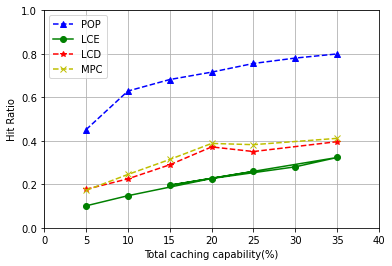

In [7]:
plt.plot(list(result['result_POP.pickle'].keys()),list(float(mean(result['result_POP.pickle'][k][4:8])/2000) for k in result['result_POP.pickle'].keys()),'b--^')
plt.plot(list(result['result_LCE.pickle'].keys()),list(float(mean(result['result_LCE.pickle'][k][4:8])/2000) for k in result['result_LCE.pickle'].keys()),'g-o')
plt.plot(list(result['result_LCD.pickle'].keys()),list(float(mean(result['result_LCD.pickle'][k][4:8])/2000) for k in result['result_LCD.pickle'].keys()),'r--*')
plt.plot(list(result['result_MPC.pickle'].keys()),list(float(mean(result['result_MPC.pickle'][k][4:8])/2000) for k in result['result_MPC.pickle'].keys()),'y--x')
plt.legend(['POP','LCE','LCD','MPC'])
plt.axis([0,40,0,1])
plt.xlabel('Total caching capability(%)')
plt.ylabel('Hit Ratio')
plt.grid()

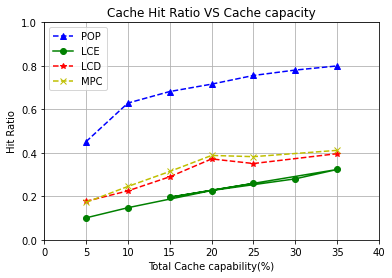

In [10]:
plt.plot(list(result['result_POP.pickle'].keys()),list(float(mean(result['result_POP.pickle'][k][4:8])/2000) for k in result['result_POP.pickle'].keys()),'b--^')
plt.plot(list(result['result_LCE.pickle'].keys()),list(float(mean(result['result_LCE.pickle'][k][4:8])/2000) for k in result['result_LCE.pickle'].keys()),'g-o')
plt.plot(list(result['result_LCD.pickle'].keys()),list(float(mean(result['result_LCD.pickle'][k][4:8])/2000) for k in result['result_LCD.pickle'].keys()),'r--*')
plt.plot(list(result['result_MPC.pickle'].keys()),list(float(mean(result['result_MPC.pickle'][k][4:8])/2000) for k in result['result_MPC.pickle'].keys()),'y--x')
plt.legend(['POP','LCE','LCD','MPC'])
plt.axis([0,40,0,1])
plt.xlabel('Total Cache capability(%)')
plt.ylabel('Hit Ratio')
plt.title('Cache Hit Ratio VS Cache capacity')
plt.grid()
if not os.path.exists('result/'):
    os.mkdir('result/')
os.chdir('result')
plt.savefig('cache_size_VS_Hit_Ratio.png')
os.chdir('../')

In [57]:
result['result_LCD.pickle'] = {}
result['result_LCD.pickle'][5] = temp[5]
result['result_LCD.pickle'][10] = temp[10]
result['result_LCD.pickle'][15] = temp[15]
result['result_LCD.pickle'][20] = temp[20]
result['result_LCD.pickle'][25] = temp[25]
result['result_LCD.pickle'][20] = temp[30]
result['result_LCD.pickle'][35] = temp[35]

## 3 use seaborn with data analysis

In [11]:
import seaborn as sns
import pandas as pd

## generate df from result

In [13]:
df = pd.DataFrame(columns = ['method','Cache Capacity' ,'Hit Ratio'])
for method in result.keys():
    for r in result[method].keys():
        #print({'method':method, 'Cache Capacity':r, 'Average Internal Traffic(requests)': mean(result[method][r][4:8])})
        df = df.append({'method':method,'Cache Capacity':r ,'Hit Ratio':mean(result[method][r][4:8])/2000},ignore_index=True)

In [17]:
result_file = 'result_hit_capacity.pickle'
if not os.path.exists('result'):
    os.mkdir('result')
os.chdir('result/')
f = open(result_file, 'wb')
pickle.dump(df,f)
f.close()
os.chdir('..')

## Plotting

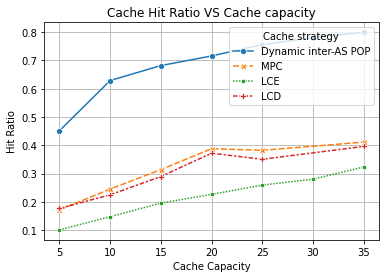

In [19]:
sns.lineplot(x = 'Cache Capacity', y = 'Hit Ratio', hue = 'method',style="method", markers = True, data = df)
plt.legend(title='Cache strategy', loc='upper right', labels=['Dynamic inter-AS POP', 'MPC', 'LCE', 'LCD'])
#plt.axis([0,40,0,6])
plt.grid()
plt.title('Cache Hit Ratio VS Cache capacity')
#sns.lineplot(x = 'Cache Capacity', y = 'Average Internal Traffic(requests)', hue = 'method', data = df)
#plt.axis([0,40,0,2000])
## 保存图片
if not os.path.exists('result/'):
    os.mkdir('result/')
os.chdir('result')
plt.savefig('Hit_Ratio_capacity.png')
os.chdir('../')